## Otimização de Carga com Algoritmo Genético

Importando bibliotecas

In [24]:
!pip install geneticalgorithm


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga

Data

In [26]:
data = pd.read_csv("Itens.csv", sep=";")
data

,ID,PESO,VALOR,VOLUME
0,1,342,1136,32
1,2,305,5349,48
2,3,442,8487,26
3,4,944,4190,25
4,5,881,6644,47
5,6,183,3068,15
6,7,315,6675,40
7,8,450,5529,27
8,9,111,5905,40
9,10,676,7936,50


Summary Statistics: basic view

In [27]:
print(f"reg: {len(data)}")
print(f"sum_weight:{data['PESO'].sum()}")
print(f"sum_vol{data['VOLUME'].sum()}")
print(f"sum_value{data['VALOR'].sum()}")

reg: 20
sum_weight:9205
sum_vol649
sum_value115609


Variables: Constraints

In [ ]:
sur_weight = 6000
sur_volume = 350
iteration = 10



Function: Assessment/Adjustment

In [41]:
def fitness_function(x, data, max_volume, max_weight):
    select_regs = data.iloc[x.astype(bool),:]
    TT_weight = select_regs['PESO'].sum()
    TT_vol = select_regs['VOLUME'].sum()
    
    if TT_weight > max_weight or TT_vol > max_volume:
        return -1
    else:
        return -select_regs['VALOR'].sum()

Set: Genetic Algorithm 

In [42]:
algorithm_param = {
    'max_num_iteration': iteration,
    'population_size': 100,
    'mutation_probability': 0.1,
    'elit_ratio': 0.01,
    'crossover_probability': 0.5,
    'parents_portion': 0.3,
    "crossover_type": 'uniform',
    'max_iteration_without_improv': None    
}

varbound =[[0, 1]] * len(data)

Set: Model

In [ ]:
model = ga(
    function=lambda x: fitness_function(x, data, sur_volume, sur_weight),
    dimension = len(data),
    variable_type='bool',
    variable_boundaries = varbound,
    algorithm_parameters = algorithm_param
)

Check model

 The best solution found:                                                                           
 [0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0.]

 Objective function:
 -75442.0


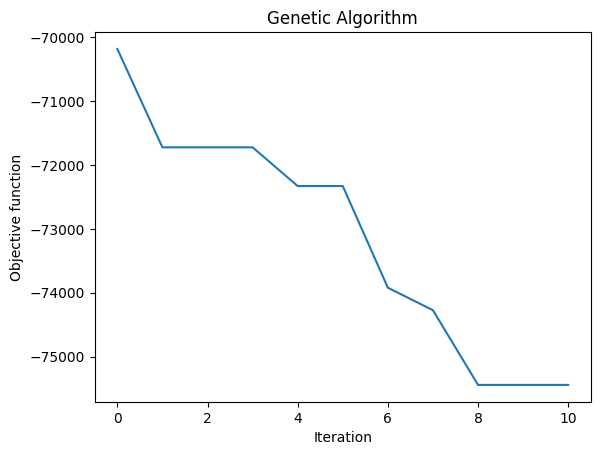

In [48]:
model.run()